## Predictive Policing for Chicago - Naive Bayes Algorithm - Ramesh Kalagnanam

In this effort we are analysing the Chicago Crime data set. Preparing the data set for machine learning, training and testing the model. Then drawing up a confusion matrix and classification report for each algorithm to predict if the crime would result in an arrest.

Dataset description:
ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

Features of Interest:

Algorithm choices and their accuracy derived by training and testing:



## Import required packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

### Data have been prepared originally by Divya (and she is modestly refusing to let me give her credit) and this application modifies it to include Month as well as sin_month and cos_month for this analysis #####

## Splitting the data for testing and training.

In [2]:
#Define a function to read the crime data into a dataframe for logistical classification modeling

def read_crime_data():
    
    file = os.path.join('Resources','prepared_data_MLXY_500.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [3]:
#Define a dataframe by calling the function used defined for reading the file into a dataframe

crime_data_df = read_crime_data()

#Display the top five rows/records of the dataframe

crime_data_df.head()

,ID,Date,IUCR,CrimeType,LocationDescription,Arrest,Domestic,Ward,CommunityArea,FBICode,...,PoliceDistricts,PoliceBeats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis
0,11858344,10/12/2019 8:00,820,THEFT,STREET,0,0,35,16,6,...,1,20,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1152059,1924617
1,11859895,10/12/2019 8:00,1310,CRIMINAL DAMAGE,RESIDENCE,0,0,6,68,14,...,17,214,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1174167,1858167
2,11862656,10/12/2019 8:00,1310,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS",0,0,45,11,14,...,12,58,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1140791,1932993
3,11858725,10/12/2019 8:00,610,BURGLARY,RESIDENCE,0,0,34,75,5,...,9,263,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1169388,1832816
4,11860087,10/12/2019 8:00,870,THEFT,OTHER,0,0,24,29,6,...,21,155,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1149926,1893578


In [4]:
# Print the number of Rows in the Data Frame

crime_data_df.shape

(1048575, 29)

In [5]:
#Define a new column "Month" because we also want to include month of the year and convert it to "numeric"

crime_data_df["Month"] = crime_data_df["Date"].str.extract('(^\d\d)')

crime_data_df[['Month']] = crime_data_df[['Month']].apply(pd.to_numeric)

crime_data_df.dropna(subset=['IUCR'])
crime_data_df.dropna(subset=['CommunityArea'])
crime_data_df.dropna(subset=['PoliceBeats'])
crime_data_df.dropna(subset=['Month'])
crime_data_df.dropna(subset=['Arrest'])

crime_data_df = crime_data_df.dropna(how = 'any')


#Display the top five rows/records of the dataframe

crime_data_df.head()

,ID,Date,IUCR,CrimeType,LocationDescription,Arrest,Domestic,Ward,CommunityArea,FBICode,...,PoliceBeats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis,Month
0,11858344,10/12/2019 8:00,820,THEFT,STREET,0,0,35,16,6,...,20,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1152059,1924617,10.0
1,11859895,10/12/2019 8:00,1310,CRIMINAL DAMAGE,RESIDENCE,0,0,6,68,14,...,214,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1174167,1858167,10.0
2,11862656,10/12/2019 8:00,1310,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS",0,0,45,11,14,...,58,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1140791,1932993,10.0
3,11858725,10/12/2019 8:00,610,BURGLARY,RESIDENCE,0,0,34,75,5,...,263,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1169388,1832816,10.0
4,11860087,10/12/2019 8:00,870,THEFT,OTHER,0,0,24,29,6,...,155,10/12/2019,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1149926,1893578,10.0


In [6]:
# Print the number of Rows in the Data Frame

crime_data_df.shape

(256771, 30)

In [7]:
#Add sin_month and cos_month because this is one way to determine the relative "closeness" of intermediate
#values to the end values. For example, "4" is closer to "1"; "7" is closer to "12" and so on

months_in_year=12
crime_data_df['sin_month']=np.sin(2*np.pi*crime_data_df.Month/months_in_year)
crime_data_df['cos_month']=np.cos(2*np.pi*crime_data_df.Month/months_in_year)

#Display the top five rows/records of the dataframe

crime_data_df.head()

,ID,Date,IUCR,CrimeType,LocationDescription,Arrest,Domestic,Ward,CommunityArea,FBICode,...,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis,Month,sin_month,cos_month
0,11858344,10/12/2019 8:00,820,THEFT,STREET,0,0,35,16,6,...,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1152059,1924617,10.0,-0.866025,0.5
1,11859895,10/12/2019 8:00,1310,CRIMINAL DAMAGE,RESIDENCE,0,0,6,68,14,...,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1174167,1858167,10.0,-0.866025,0.5
2,11862656,10/12/2019 8:00,1310,CRIMINAL DAMAGE,"SCHOOL, PUBLIC, GROUNDS",0,0,45,11,14,...,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1140791,1932993,10.0,-0.866025,0.5
3,11858725,10/12/2019 8:00,610,BURGLARY,RESIDENCE,0,0,34,75,5,...,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1169388,1832816,10.0,-0.866025,0.5
4,11860087,10/12/2019 8:00,870,THEFT,OTHER,0,0,24,29,6,...,8:00:00 AM,8:00:00,8,0.81697,-0.57668,1149926,1893578,10.0,-0.866025,0.5


In [8]:
# Print the number of Rows in the Data Frame

crime_data_df.shape

(256771, 32)

# The following Cell is left commented out 

In [9]:
#Plot the sin-cosine scatter plot

#crime_data_df.sample(1000).plot.scatter('sin_month','cos_month')

# The following Cell is left commented out

In [10]:
#plt.stem(crime_data_df['sin_month'],crime_data_df['cos_month'], 'r',use_line_collection=True )
#plt.plot(x,y)

In [11]:
### Splitting data for training and testing

#From sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

#Define the independent variables "IUCR", "Community Area" and time expressed as "sin_time" and "cos_time"

feature_col_names = ['IUCR','CommunityArea','PoliceBeats','sin_time','cos_time','sin_month','cos_month']

#Define the dependent variable "Arrest"

predicted_class_names = ['Arrest']

X = crime_data_df[feature_col_names].values

y = crime_data_df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

#split_test_size = 0.3 is 30%, 42 is the answer to everything

In [12]:
##Check to ensure we have the the desired 70% train, 30% test split of the data

print("{0:0.2f}% in training set".format((len(X_train)/len(crime_data_df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(crime_data_df.index)) * 100))

70.00% in training set
30.00% in test set


In [13]:
from sklearn import metrics

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(crime_data_df.loc[crime_data_df['Arrest'] == 1]), (len(crime_data_df.loc[crime_data_df['Arrest'] == 1])/len(crime_data_df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(crime_data_df.loc[crime_data_df['Arrest'] == 0]), (len(crime_data_df.loc[crime_data_df['Arrest'] == 0])/len(crime_data_df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 50398 (19.63%)
Original False : 206373 (80.37%)

Training True  : 35392 (19.69%)
Training False : 144347 (80.31%)

Test True      : 15006 (19.48%)
Test False     : 62026 (80.52%)


### Naive Bayes algorithm

In [15]:
#### Fitting the model
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Naive Bayes Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Naive Bayes Training Accuracy: 0.7708



In [17]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Naive Bayes Testing Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 ... 0 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Naive Bayes Testing Accuracy: 0.7725


In [18]:
#Write the values of TP, FP, FN and TP

tn, fp, fn, tp = metrics.confusion_matrix(y_test, nb_predict_test).ravel()
print(f"tn: {tn:3d}   fp: {fp:3d}")
print(f"fn: {fn:3d}   tp: {tp:3d}")

tn: 58396   fp: 3630
fn: 13893   tp: 1113


In [19]:
print("Naive Bayes Confusion Matrix")
print("")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Naive Bayes Classification Report")
print("")

print(metrics.classification_report(y_test, nb_predict_test))

Naive Bayes Confusion Matrix

[[58396  3630]
 [13893  1113]]

Naive Bayes Classification Report

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     62026
           1       0.23      0.07      0.11     15006

    accuracy                           0.77     77032
   macro avg       0.52      0.51      0.49     77032
weighted avg       0.70      0.77      0.72     77032



In [20]:
### save the trained model into a file
from sklearn.externals import joblib

joblib.dump(nb_model, "./chicago-crime-trained-model-NB-Ramesh.pkl")

C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./chicago-crime-trained-model-NB-Ramesh.pkl']

# Plotting the Naive Bayes plot

C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expec

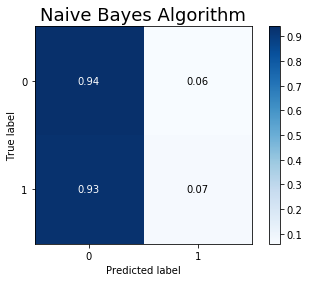

In [21]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(nb_model, X, y)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)

plt.title("Naive Bayes Algorithm", fontsize = 18)

# Save figure

plt.savefig("naive_bayes_confusion_matrix.png", bbox_inches="tight")

plt.show()